In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer, util
from scipy.spatial import cKDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import pickle
import re
from utils.normalizor import normalizor
import tqdm
import math

In [9]:
model = SentenceTransformer('all-roberta-large-v1')
# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
# model.load_state_dict(torch.load('model1.pt'))

In [10]:
correct = 0
dif = 0
mp = {}
ma = 0

plotx = []
ploty = []

In [11]:
tree : cKDTree
Comments = []

with open("data/data.pkl", "rb") as f:
    raw = pickle.load(f)
    tree = pickle.loads(raw)

with open("data/comments.pkl", "rb") as f:
    Comments = pickle.load(f)

In [12]:
import string
for num, (position, comment) in enumerate(Comments):

    q = tree.query(normalizor(model.encode(comment, convert_to_tensor=False)), 5)[1]

    miny = 1000000000
    for y in q:
        miny = min(miny, abs(y - num))
        if abs(y - num) < len(Comments) / 100:
            correct += 1
            break
    plotx.append(num)
    ploty.append(miny)
    if num % 100 == 1:
        print("[{}/{}]({:.2f}%) correct:{}(rate:{:.2f}%)".format(num, len(Comments), num/len(Comments)*100, correct, correct / (num + 1) * 100))

print('{:.2f}%'.format(correct / len(Comments) * 100))

[1/16371](0.01%) correct:2(rate:100.00%)
[101/16371](0.62%) correct:63(rate:61.76%)
[201/16371](1.23%) correct:152(rate:75.25%)
[301/16371](1.84%) correct:223(rate:73.84%)
[401/16371](2.45%) correct:302(rate:75.12%)
[501/16371](3.06%) correct:369(rate:73.51%)
[601/16371](3.67%) correct:449(rate:74.58%)
[701/16371](4.28%) correct:507(rate:72.22%)
[801/16371](4.89%) correct:593(rate:73.94%)
[901/16371](5.50%) correct:683(rate:75.72%)
[1001/16371](6.11%) correct:758(rate:75.65%)
[1101/16371](6.73%) correct:837(rate:75.95%)
[1201/16371](7.34%) correct:911(rate:75.79%)
[1301/16371](7.95%) correct:985(rate:75.65%)
[1401/16371](8.56%) correct:1066(rate:76.03%)
[1501/16371](9.17%) correct:1140(rate:75.90%)
[1601/16371](9.78%) correct:1229(rate:76.72%)
[1701/16371](10.39%) correct:1297(rate:76.20%)
[1801/16371](11.00%) correct:1351(rate:74.97%)
[1901/16371](11.61%) correct:1415(rate:74.40%)
[2001/16371](12.22%) correct:1482(rate:74.03%)
[2101/16371](12.83%) correct:1541(rate:73.31%)
[2201/16371

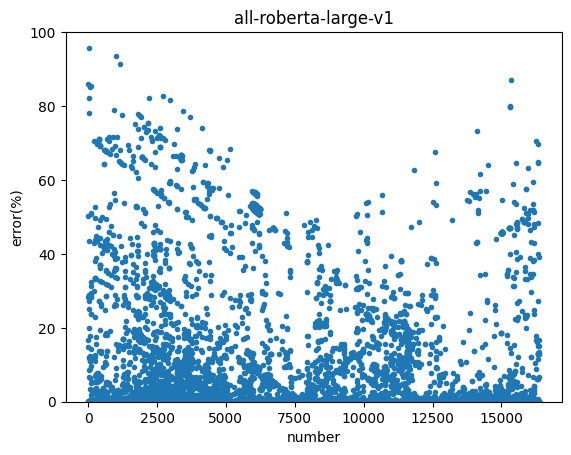

In [13]:
y = [y / len(Comments) * 100 for y in ploty]
plt.plot(plotx, y, '.')
plt.ylim(0, 100)
plt.xlabel("number")
plt.ylabel("error(%)")
plt.title("all-roberta-large-v1")
plt.show()